In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [22]:
files = glob.glob('../CONTPEAKS/MIMIC/*.csv')
files.sort()
#Number of Trials
trials = 3
#File name beginining
nb = 29
#File name ending
ne = -10
#Output file
name = '../CONTPEAKS/contpeaks.csv'
#Range
r = [5,10,50,100,200,300,400,500]

In [23]:
files

['../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.1_1_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.1_2_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.1_3_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.3_1_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.3_2_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.3_3_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.5_1_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.5_2_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.5_3_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.7_1_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.7_2_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.7_3_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.9_1_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.9_2_LOG.csv',
 '../CONTPEAKS/MIMIC/CONTPEAKS_MIMIC100_50_0.9_3_LOG.csv']

In [24]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [25]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

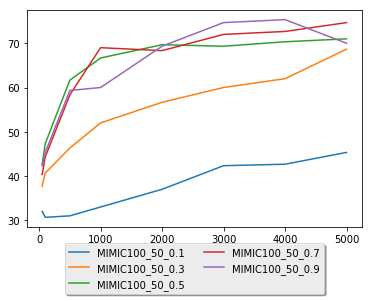

In [26]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

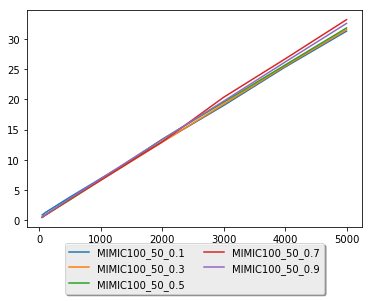

In [27]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [28]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 MIMIC100_50_0.1
1 MIMIC100_50_0.3
2 MIMIC100_50_0.5
3 MIMIC100_50_0.7
4 MIMIC100_50_0.9


In [29]:
#Change this
df = df_concats[3]
df

,iterations,fitness,time,fevals
5,50,40.333333,0.475465,6500
10,100,44.333333,0.828007,12000
50,500,58.333333,3.471615,56000
100,1000,69.000000,6.596052,111000
200,2000,68.333333,12.943645,221000
300,3000,72.000000,20.325317,331000
400,4000,72.666667,26.675977,441000
500,5000,74.666667,33.180699,551000


In [30]:
with open(name, 'a') as f:
    f.write('#MIMIC\n')
    
df.to_csv(name, sep=',', mode='a', header=True)